<a href="https://colab.research.google.com/github/Anushri-Sakhardande/Aurora_Hackathon/blob/main/SkinType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get dataset from kaggle

In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asugarcane","key":"ddc48fc59bbcc03a42dd13cc9e620ea8"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d shakyadissanayake/oily-dry-and-normal-skin-types-dataset


Dataset URL: https://www.kaggle.com/datasets/shakyadissanayake/oily-dry-and-normal-skin-types-dataset
License(s): apache-2.0
 96% 119M/124M [00:00<00:00, 193MB/s] 
100% 124M/124M [00:00<00:00, 183MB/s]


In [9]:
import zipfile
with zipfile.ZipFile("oily-dry-and-normal-skin-types-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")


#EDA

In [28]:
import os

# Path to dataset
dataset_path = "dataset-folder/Oily-Dry-Skin-Types"

# List the subdirectories (classes) in train, test, and validate
for split in ['train', 'test', 'valid']:
    split_path = os.path.join(dataset_path, split)
    print(f"{split} classes:")
    print(os.listdir(split_path))
    for class_dir in os.listdir(split_path):
        class_path = os.path.join(split_path, class_dir)
        print(f"{class_dir} has {len(os.listdir(class_path))} images")
    print("\n")


train classes:
['normal', 'oily', 'dry']
normal has 1104 images
oily has 1000 images
dry has 652 images


test classes:
['normal', 'oily', 'dry']
normal has 59 images
oily has 40 images
dry has 35 images


valid classes:
['normal', 'oily', 'dry']
normal has 111 images
oily has 80 images
dry has 71 images




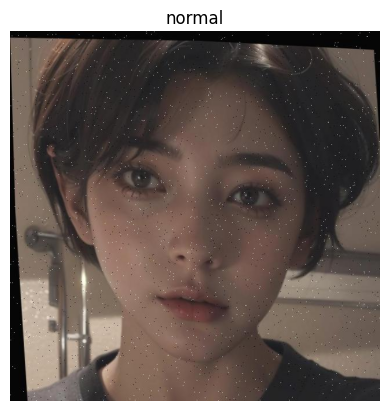

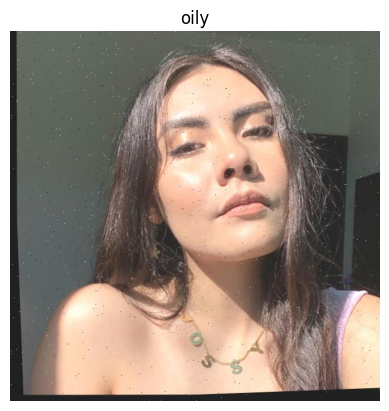

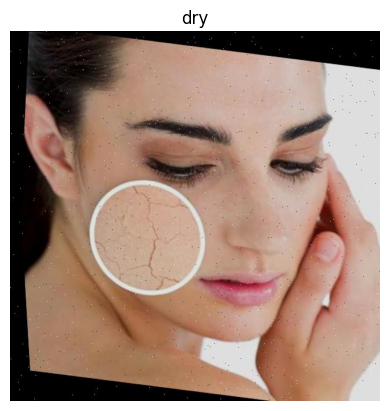

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Visualize random images from each class
def visualize_images(data_dir, classes):
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        random_image = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, random_image)
        img = mpimg.imread(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

# Specify the path to training images and classes
train_path = "dataset-folder/Oily-Dry-Skin-Types/train"
classes = os.listdir(train_path)
visualize_images(train_path, classes)


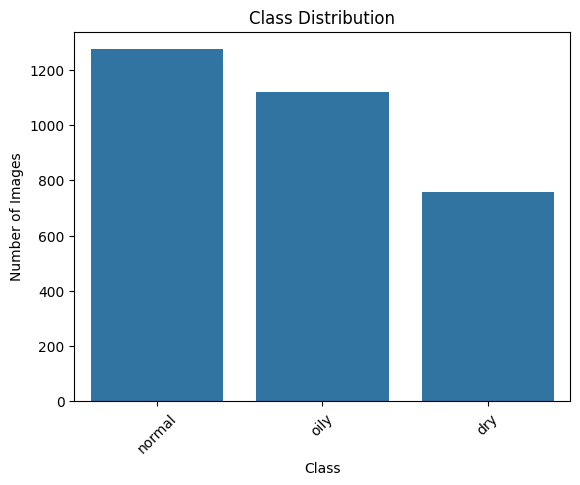

In [32]:
import pandas as pd
import seaborn as sns

# Count the number of images per class
class_counts = {}
for split in ['train', 'test', 'valid']:
    split_path = os.path.join(dataset_path, split)
    for class_dir in os.listdir(split_path):
        class_path = os.path.join(split_path, class_dir)
        if class_dir not in class_counts:
            class_counts[class_dir] = 0
        class_counts[class_dir] += len(os.listdir(class_path))

# Plot the distribution
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
sns.barplot(x=class_counts_df.index, y=class_counts_df['Image Count'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


Image dimensions summary:         Width  Height
count  3152.0  3152.0
mean    640.0   640.0
std       0.0     0.0
min     640.0   640.0
25%     640.0   640.0
50%     640.0   640.0
75%     640.0   640.0
max     640.0   640.0


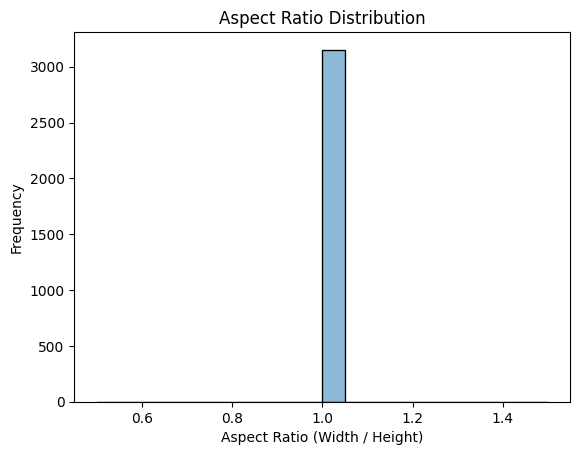

In [34]:
from PIL import Image
import numpy as np

# Analyze image dimensions
image_shapes = []
for split in ['train', 'test', 'valid']:
    split_path = os.path.join(dataset_path, split)
    for class_dir in os.listdir(split_path):
        class_path = os.path.join(split_path, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            image_shapes.append(img.size)  # Width, Height

# Convert dimensions to numpy array and inspect
image_shapes = np.array(image_shapes)
print(f"Image dimensions summary: {pd.DataFrame(image_shapes, columns=['Width', 'Height']).describe()}")

# Visualize aspect ratio distribution
aspect_ratios = image_shapes[:, 0] / image_shapes[:, 1]
sns.histplot(aspect_ratios, bins=20, kde=True)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()


#Imports

In [17]:
!pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 810.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Efficient Net B0

In [40]:
import tensorflow as tf

# Paths to your dataset folders
train_dir = "dataset-folder/Oily-Dry-Skin-Types/train"
test_dir = "dataset-folder/Oily-Dry-Skin-Types/test"
val_dir = "dataset-folder/Oily-Dry-Skin-Types/valid"

# Create training, testing, and validation datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,  # Batch size for training
    label_mode="categorical"  # Since you're using `categorical_crossentropy`
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)


Found 2756 files belonging to 3 classes.
Found 134 files belonging to 3 classes.
Found 262 files belonging to 3 classes.


In [41]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Flip images horizontally
    tf.keras.layers.RandomRotation(0.2),      # Rotate images randomly
    tf.keras.layers.RandomZoom(0.2),          # Zoom in/out randomly
    tf.keras.layers.RandomBrightness(0.2)     # Adjust brightness
])

# Apply augmentation during data loading
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))


In [42]:
# Load the EfficientNetB0 model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False  # Freeze the base model weights

# Setting up input and layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)  # Use inputs here
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)  # 3 classes
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [43]:
# Fit the model
history_1 = model_1.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.4120 - loss: 1.0868 - val_accuracy: 0.3664 - val_loss: 1.1166
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.4758 - loss: 1.0127 - val_accuracy: 0.3855 - val_loss: 1.0980
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.5132 - loss: 0.9823 - val_accuracy: 0.3931 - val_loss: 1.1011


In [44]:
test_loss, test_accuracy = model_1.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4649 - loss: 1.0949
Test Accuracy: 47.01%


In [45]:
# Save the model
model_1.save("efficient_model.h5")


In [46]:
# Unfreeze the base model
base_model.trainable = True

# Recompile the model with a smaller learning rate
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller learning rate
    metrics=["accuracy"]
)

# Train the model again (fine-tuning)
history_2 = model_1.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Start with a few epochs to avoid overfitting
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 950s 10s/step - accuracy: 0.4032 - loss: 1.0835 - val_accuracy: 0.3664 - val_loss: 1.1349
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 902s 10s/step - accuracy: 0.4677 - loss: 1.0447 - val_accuracy: 0.3397 - val_loss: 1.1483
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 930s 10s/step - accuracy: 0.4934 - loss: 1.0159 - val_accuracy: 0.3473 - val_loss: 1.1311


In [47]:
test_loss, test_accuracy = model_1.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4407 - loss: 1.0868
Test Accuracy: 43.28%


In [48]:
# Save the model
model_1.save("efficient_fine_tuned_model.h5")


In [49]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define class labels and samples
classes = ['oily', 'dry', 'normal']
class_counts = [1120, 758, 1274]

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced",
                                     classes=np.array([0, 1, 2]),  # Numeric labels
                                     y=np.repeat([0, 1, 2], class_counts))  # Labels repeated by their counts
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)


Class Weights: {0: 0.9380952380952381, 1: 1.386103781882146, 2: 0.8246991104133962}


In [50]:
history_3 = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
    class_weight=class_weights
)


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 922s 10s/step - accuracy: 0.4978 - loss: 1.0586 - val_accuracy: 0.4403 - val_loss: 1.0729
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


87/87 ━━━━━━━━━━━━━━━━━━━━ 903s 10s/step - accuracy: 0.5232 - loss: 1.0113 - val_accuracy: 0.4328 - val_loss: 1.1544
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 869s 10s/step - accuracy: 0.5481 - loss: 0.9820 - val_accuracy: 0.4179 - val_loss: 1.1812


In [57]:
test_loss, test_accuracy = model_1.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3897 - loss: 1.1689
Test Accuracy: 41.79%


In [58]:
# Save the model
model_1.save("efficient_class_weighted_model.h5")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#SkinAI (ResNet50)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from copy import deepcopy

from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import os


In [2]:
label_index = {"acne": 0, "dry": 1, "normal": 2, "oily": 3,"wrinkle":5, "problematic":4 }
index_label = {0: "acne", 1: "dry", 2: "normal", 3: "oily", 5: "wrinkle", 4:"problematic"}

In [3]:
def create_df(base):
    dd = {"images": [], "labels": []}
    for i in os.listdir(base):
        label = os.path.join(base, i)
        for j in os.listdir(label):
            img = os.path.join(label, j)
            dd["images"] += [img]
            dd["labels"] += [label_index[i]]
    return pd.DataFrame(dd)

In [10]:
train_df = create_df("dataset-folder/Oily-Dry-Skin-Types/train")
val_df = create_df("dataset-folder/Oily-Dry-Skin-Types/valid")
test_df = create_df("dataset-folder/Oily-Dry-Skin-Types/test")

train_df = pd.concat([train_df, val_df, test_df])

In [11]:
EPOCHS = 25
LR = 0.1
STEP = 15
GAMMA = 0.1
BATCH = 32
OUT_CLASSES = 6
IMG_SIZE = 224

class CloudDS(Dataset):
    def __init__(self, data, transform):
        super(CloudDS, self).__init__()
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, x):
        img, label = self.data.iloc[x, 0], self.data.iloc[x, 1]
        img = Image.open(img).convert("RGB")
        img = self.transform(np.array(img))

        return img, label

train_transform = transforms.Compose([transforms.ToPILImage(),
                               transforms.ToTensor(),
                               transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                transforms.RandomVerticalFlip(0.6),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])])

transform = transforms.Compose([transforms.ToPILImage(),
                               transforms.ToTensor(),
                               transforms.Resize((IMG_SIZE, IMG_SIZE)),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])])

train, testing = train_test_split(train_df, random_state=42, test_size=0.2)
val, test = train_test_split(testing, random_state=42, test_size=0.5)

train_ds = CloudDS(train, train_transform)
val_ds = CloudDS(val, transform)


train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH, shuffle=False)

In [12]:
resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
num_ftrs = resnet.fc.in_features
resnet.fc.in_features = nn.Linear(num_ftrs, OUT_CLASSES)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 150MB/s]


cpu


In [13]:
model = deepcopy(resnet)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

In [14]:
best_model = deepcopy(model)
best_acc = 0

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for i in range(1, EPOCHS+1):
    model.train()

    diff = 0
    total = 0
    acc = 0

    for data, target in train_dl:
        optimizer.zero_grad()
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        out = model(data)
        loss = criterion(out, target)
        diff += loss.item()
        acc += (out.argmax(1) == target).sum().item()
        total += out.size(0)
        loss.backward()
        optimizer.step()

    train_loss += [diff/total]
    train_acc += [acc/total]

    model.eval()

    diff = 0
    total = 0
    acc = 0

    with torch.no_grad():
        for data, target in val_dl:
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            out = model(data)
            loss = criterion(out, target)
            diff += loss.item()
            acc += (out.argmax(1) == target).sum().item()
            total += out.size(0)

    val_loss += [diff/total]
    val_acc += [acc/total]

    if val_acc[-1] > best_acc:
        best_acc = val_acc[-1]
        best_model = deepcopy(model)

    scheduler.step()

    print("Epochs {} train loss {} acc {} val loss {} acc {}".format(i, train_loss[-1],
                                                                    train_acc[-1], val_loss[-1],
                                                                    val_acc[-1]))

Epochs 1 train loss 0.045213237115193435 acc 0.43395477984926617 val loss 0.030388999931396 acc 0.5714285714285714
Epochs 2 train loss 0.02438746108416762 acc 0.6687822292740976 val loss 0.02974979527412899 acc 0.6031746031746031


KeyboardInterrupt: 

In [ ]:
epochs = list(range(1, EPOCHS+1))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
axes[0].plot(epochs, train_loss)
axes[0].plot(epochs, val_loss)
axes[0].legend(["Training", "Validation"])
axes[0].set_title("Loss log")

axes[1].plot(epochs, train_acc)
axes[1].plot(epochs, val_acc)
axes[1].legend(["Training", "Validation"])
axes[1].set_title("Accuracy log")

plt.tight_layout()
plt.show()